# Flamespeed 

#### Bernard Kleynhans, Tim Lee, Yaniv Toledano (Group 14)


***

# 1. Installation

**Flamespeed can easily be installed using PyPI**

```bash
pip install flamespeed
```

# 2. Getting started

### Import package

In [1]:
from flamespeed import chemkin

### Instantiate class and import reaction data

In [2]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_mixed.xml')
print(fs)

Number_of_reactions:11                     
Number_of_species:8                     
Number_of_reversible_reactions:2                     
Reversible:Some                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']



### Calculate reaction rate for system of elementary reactions

In [3]:
# Specie concentrations
conc = [0.5, 1, 1, 2, 0, 1, 1, 2]

# Set temperature
fs.set_temp(250)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['H: -4.0624E+13',
 'O: -3.2625E+13',
 'OH: 6.0693E+13',
 'H2: 6.2793E+12',
 'H2O: 4.0622E+13',
 'O2: 7.4728E+13',
 'HO2: -1.0428E+14',
 'H2O2: -4.7978E+12']

# 3. Input validation (new)

## Conservation of mass

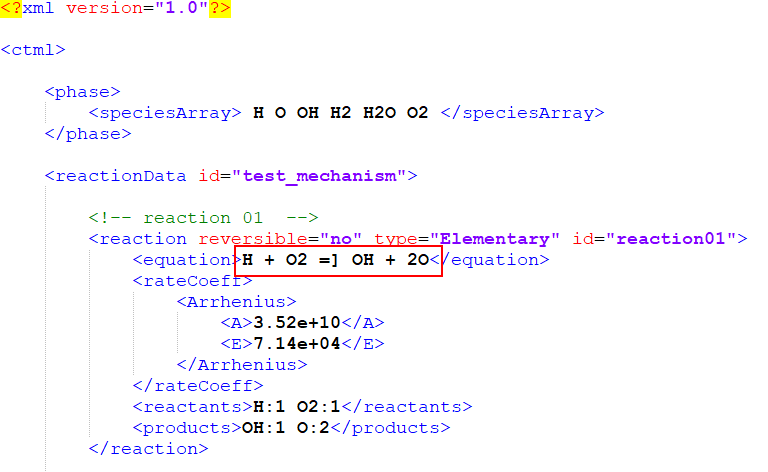

In [4]:
from IPython.display import Image
Image('images/conservation_of_mass.png')

In [5]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_conservation.xml', check_mass=True)
print(fs)

ValueError: Conservation of mass violation in reaction data.

In [6]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_conservation.xml', check_mass=False)
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



## Check that species are included in thermo database

In [7]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_specie_db.xml', check_mass=True)
print(fs)

ValueError: No data exists in the thermo database for the following species: {'OZ', 'Z'}

In [8]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_specie_db.xml', check_mass=False)
print(fs)

Number_of_reactions:3                     
Number_of_species:8                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['Z', 'OZ', 'H', 'O', 'OH', 'H2', 'H2O', 'O2']



## Check self-consistency of XML file

#### Example 1

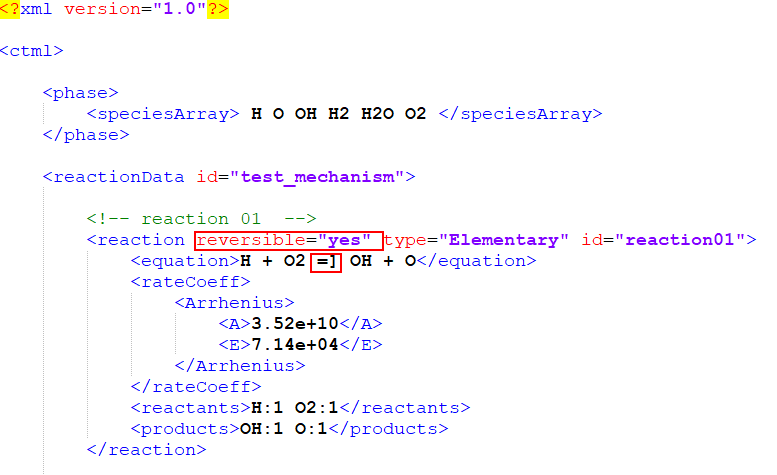

In [9]:
Image('images/consistency1.png')

In [10]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_1.xml', verify_integrity=True)
print(fs)

ValueError: Reversible tag inconsistent with reaction equation for reaction id: 1

In [11]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_1.xml', verify_integrity=False)
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:1                     
Reversible:Some                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



#### Example 2

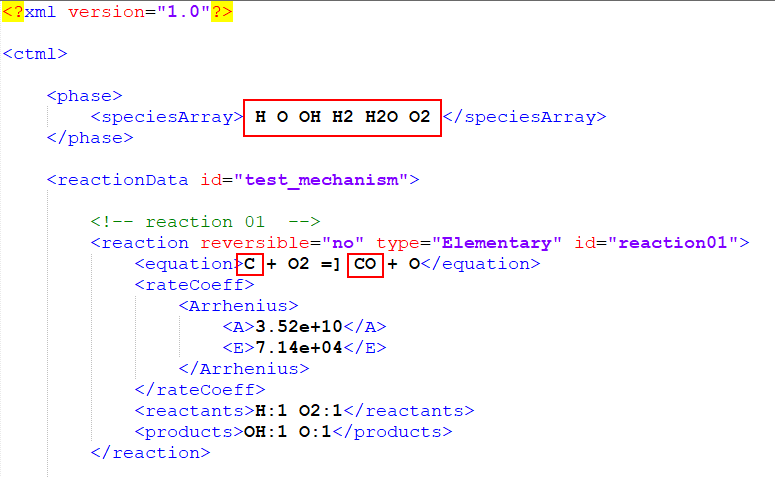

In [12]:
Image('images/consistency2.png')

In [13]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_2.xml', check_mass=False)
print(fs)

ValueError: Specie 'C' listed in reaction equation, not included in species phase array.

#### Example 3

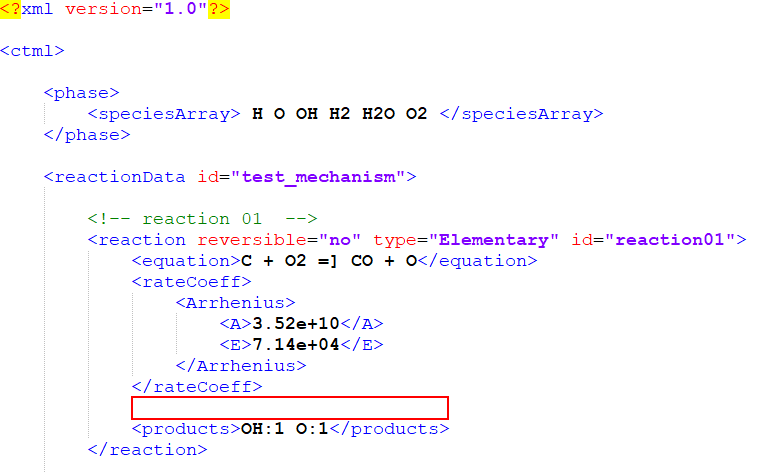

In [14]:
Image('images/consistency3.png')

In [15]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_3.xml', verify_integrity=True)
print(fs)

ValueError: Missing data in input file.

# 4. Unit conversion (new)

### What Units?
#### Where do units play a role?

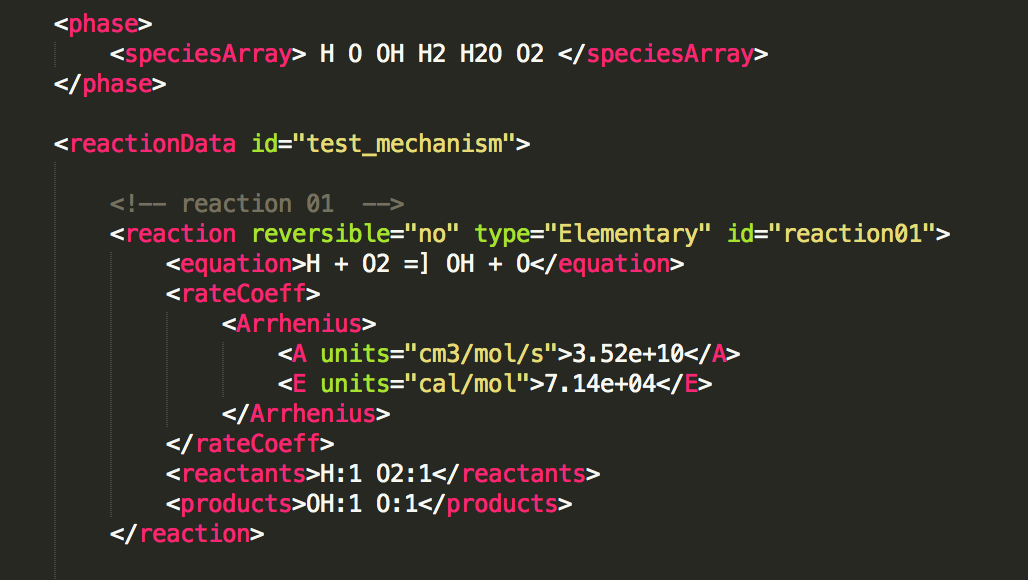

In [16]:
Image('images/units_image.png')

We see that the **Arrhenius prefactor "A"** and **activation energy "E"** have units which are not necessarily SI and, for that matter, not necessarily consistent either. To make sure all units are consistent, and as such make sure the results make sense, we convert units to SI and specifically m / J / mol.

#### User-friendly unit conversion

In [17]:
import pandas as pd
df = pd.read_csv('files/units.csv')
df

,Unit,Conversion
0,cal,4.184000e+00
1,kcal,4.184000e+03
2,kJ,1.000000e+03
3,yd,9.144000e-01
4,ft,3.048000e-01
5,cm,1.000000e-02
6,mm,1.000000e-03
7,cm3,1.000000e-06
8,dm3,1.000000e-03
9,L,1.000000e-03


### Convert Units True or False?
#### Setting the conversion to False

In [18]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units.xml', convert_units=False)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']

#### Setting the conversion to True

In [19]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units.xml', convert_units=True)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates with unconverted units:


['H: 2.0000E+03',
 'O: -1.2711E-07',
 'OH: -2.0000E+03',
 'H2: -2.0000E+03',
 'H2O: 2.0000E+03',
 'O2: -8.2624E-17']

### Unit Conversion if No Units Are Specified

#### Example Input File

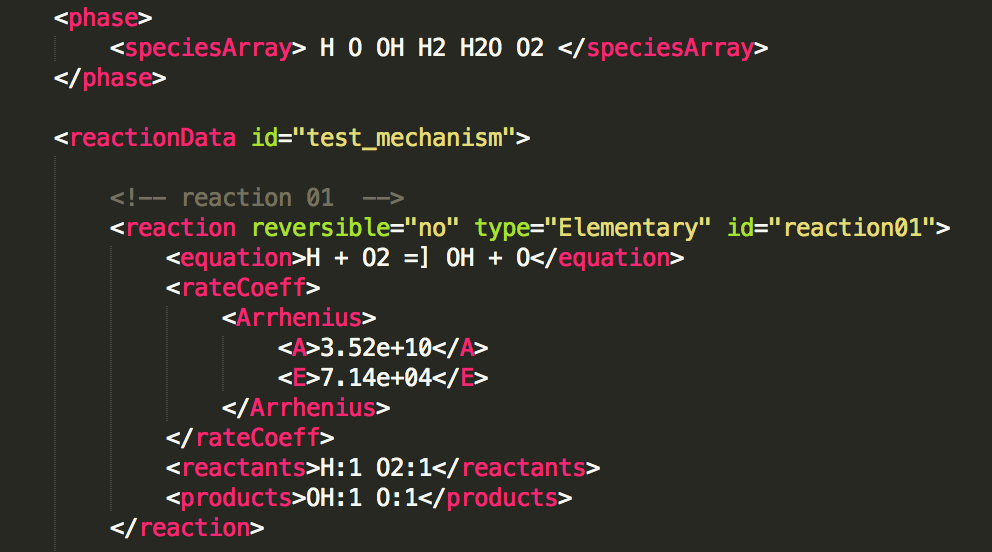

In [20]:
Image('images/no_units_image.png')

#### Running Code With Convert_Units = True

In [21]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns.xml', convert_units=True)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

ValueError: Input file contains no units. Set convert_units to False to continue

#### Running Code With Convert_Units = False

In [22]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns.xml', convert_units=False)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']

### Unit Conversion If Unit Is Not Implemented
#### Example Input File

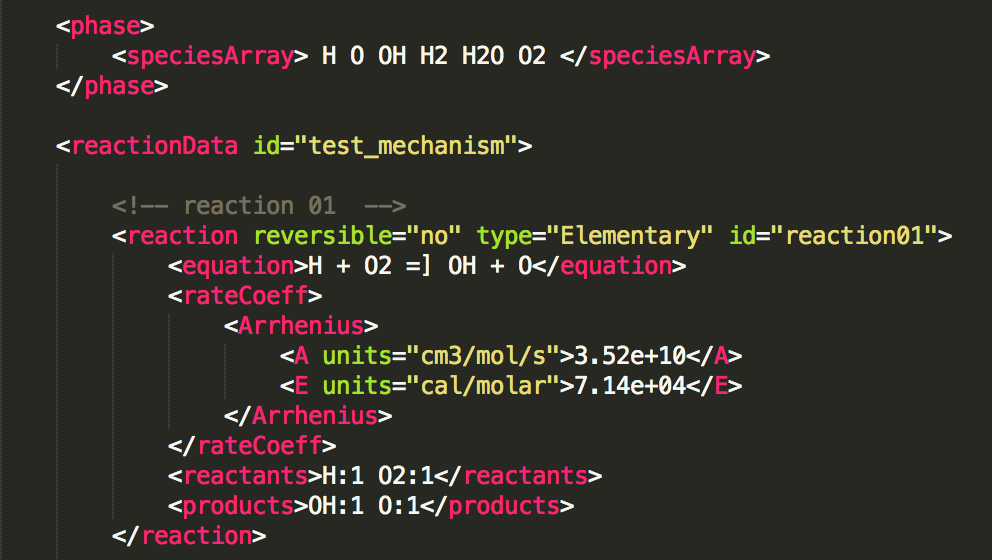

In [23]:
Image('images/unimplemented_unit_image.png')

#### Running Code With Convert_Units = True

In [24]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units_2.xml', convert_units=True)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

NotImplementedError: molar not implemented.

#### Running Code With Convert_Units = False

In [25]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units_2.xml', convert_units=False)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']

# 5. Parsing non-elementary reactions (new)

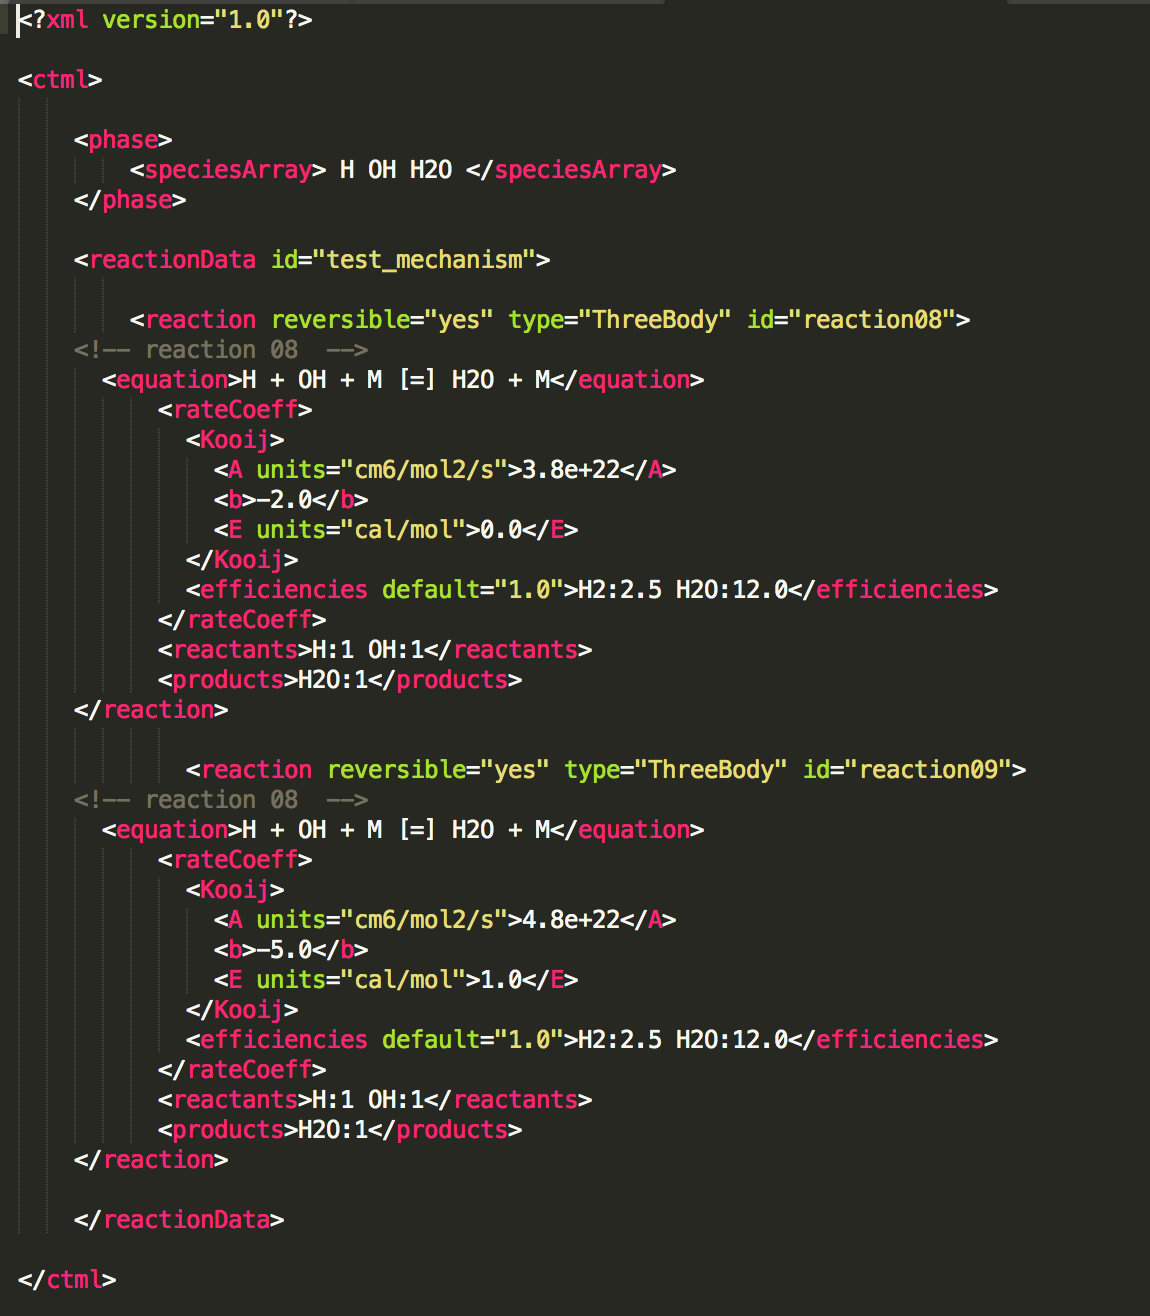

In [26]:
Image('images/threebody.png')

In [27]:
# Import reaction data
a = chemkin.ReactionRate()
print ("[Tree Body Parsed]")
a.read_XML('./files/rxn_ThreeBody.xml', verify_integrity=True, convert_units=True)
print (a)
for idx, item in enumerate(a.k_params_nonelementary):
    print ("Reaction {}".format(str(idx)))
    for rxn in item:
        print (rxn)

[Tree Body Parsed]
Number_of_reactions:2                     
Number_of_species:3                     
Number_of_reversible_reactions:2                     
Reversible:Yes                     
Reaction_type:ThreeBody                     
Species_list:['H', 'OH', 'H2O']

Reaction 0
{'Type': 'Kooij', 'A': 38000000000.0, 'b': -2.0, 'E': 0.0, 'name': None}
{'Type': 'efficiencies', 'H2': '2.5', 'H2O': '12.0', 'default': '1.0'}
Reaction 1
{'Type': 'Kooij', 'A': 48000000000.0, 'b': -5.0, 'E': 4.1840000000000002, 'name': None}
{'Type': 'efficiencies', 'H2': '2.5', 'H2O': '12.0', 'default': '1.0'}


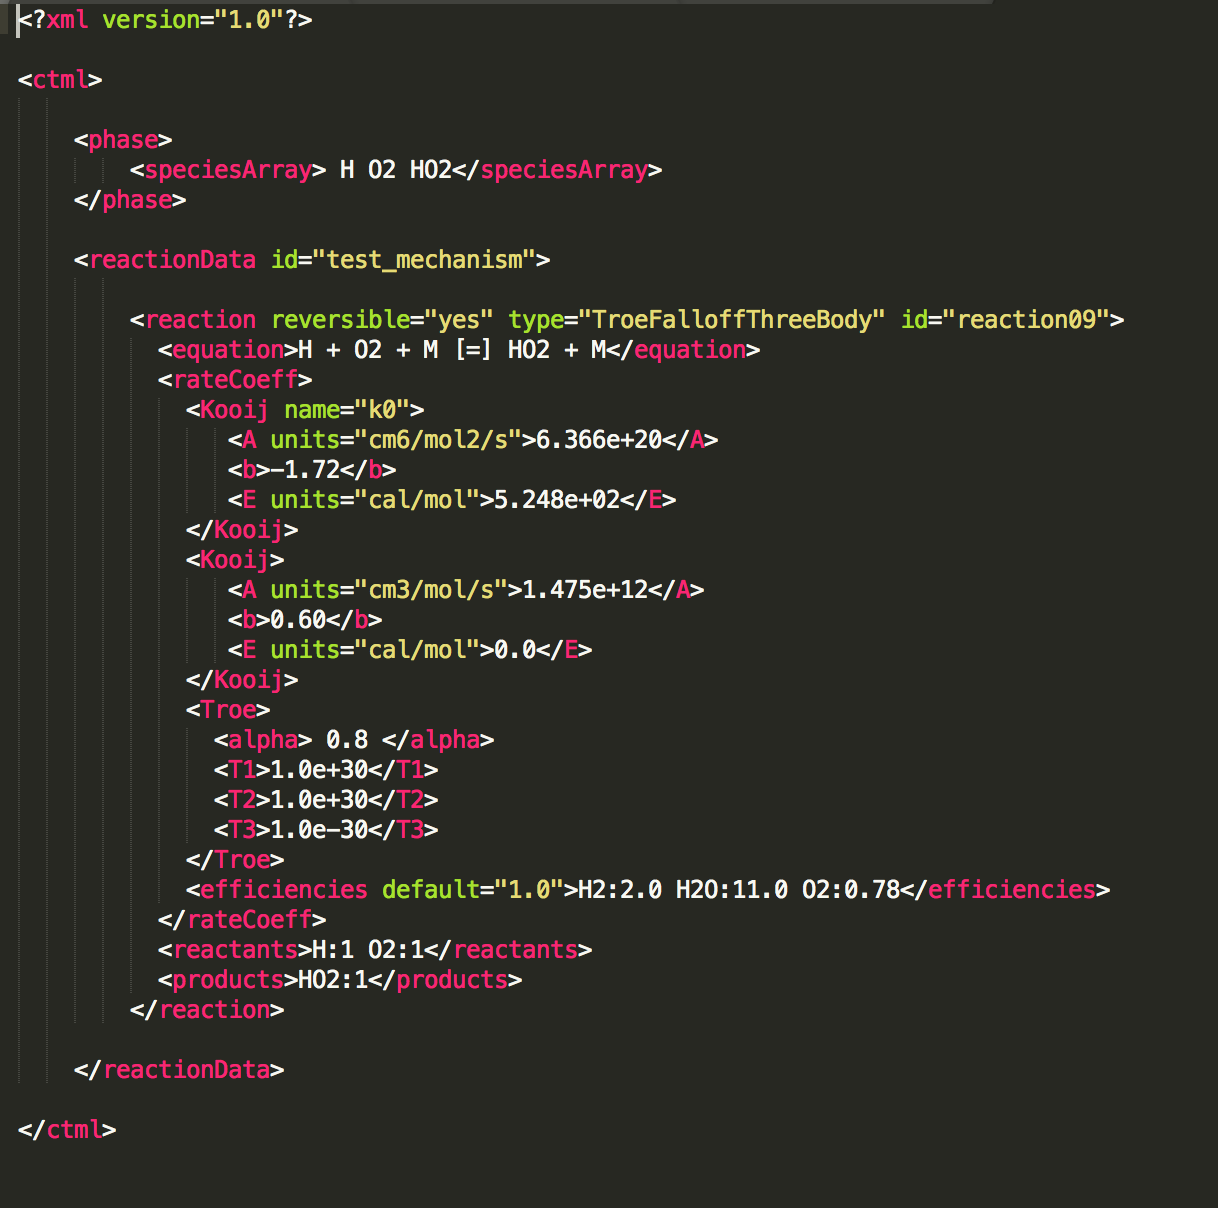

In [28]:
Image('images/troethreebody.png')

In [29]:
# Import reaction data
a = chemkin.ReactionRate()
print ("\n[Troe Tree Body Parsed]")
a.read_XML('./files/rxn_TroeFalloffThreeBody.xml', verify_integrity=True, convert_units=True)
print (a)
for idx, item in enumerate(a.k_params_nonelementary):
    print ("Reaction {}".format(str(idx)))
    for rxn in item:
        print (rxn)


[Troe Tree Body Parsed]
Number_of_reactions:1                     
Number_of_species:3                     
Number_of_reversible_reactions:1                     
Reversible:Yes                     
Reaction_type:TroeFalloffThreeBody                     
Species_list:['H', 'O2', 'HO2']

Reaction 0
{'Type': 'Kooij', 'A': 636600000.0, 'b': -1.72, 'E': 2195.7631999999999, 'name': 'k0'}
{'Type': 'Kooij', 'A': 1475000.0, 'b': 0.6, 'E': 0.0, 'name': None}
{'Type': 'Troe', 'alpha': 0.8, 't1': 1e+30, 't2': 1e+30, 't3': 1e+30}
{'Type': 'efficiencies', 'H2': '2.0', 'H2O': '11.0', 'O2': '0.78', 'default': '1.0'}


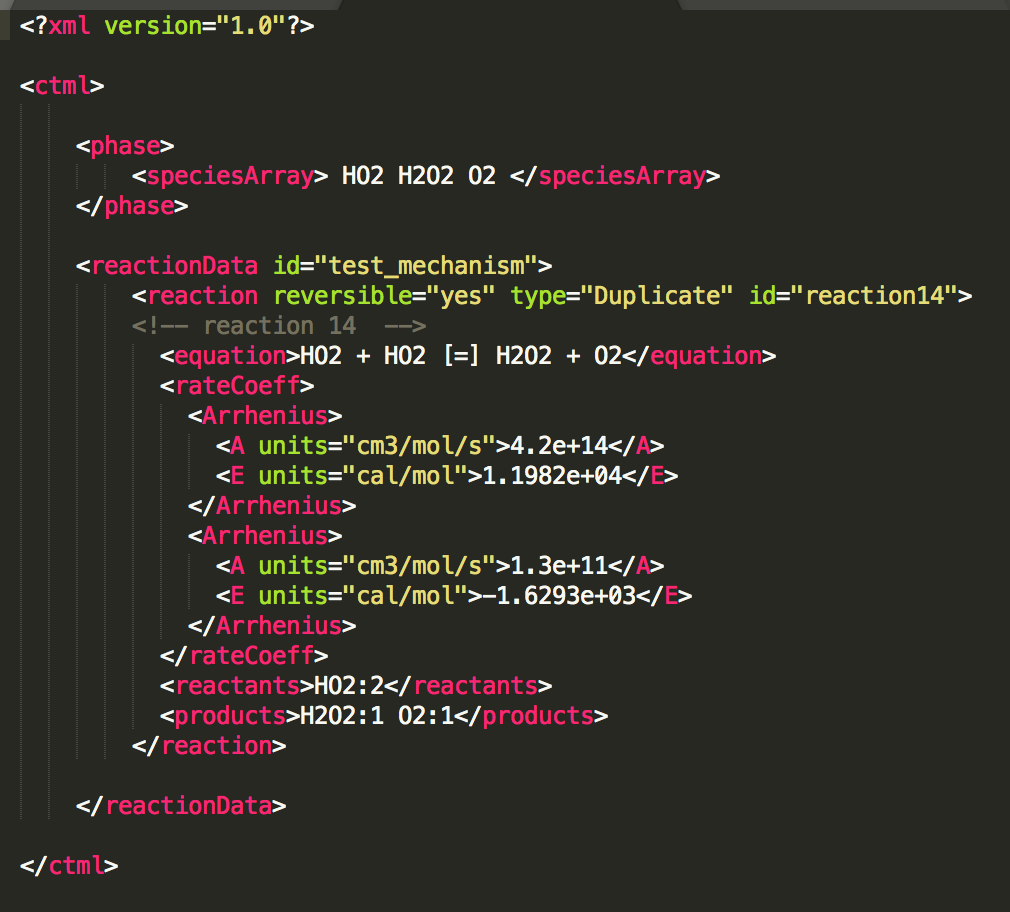

In [30]:
Image('images/duplicate.png')

In [31]:
# Import reaction data
a = chemkin.ReactionRate()
print ("\n[Duplicate Parsed]")
a.read_XML('./files/rxn_Duplicate.xml', verify_integrity=True, convert_units=True)
print (a)
for idx, item in enumerate(a.k_params_nonelementary):
    print ("Reaction {}".format(str(idx)))
    for rxn in item:
        print (rxn)


[Duplicate Parsed]
Number_of_reactions:1                     
Number_of_species:3                     
Number_of_reversible_reactions:1                     
Reversible:Yes                     
Reaction_type:Duplicate                     
Species_list:['HO2', 'H2O2', 'O2']

Reaction 0
{'Type': 'Arrhenius', 'A': 420000000.0, 'E': 50132.688000000002}
{'Type': 'Arrhenius', 'A': 130000.0, 'E': -6816.9912000000004}
